# Compare behavior cloning

This notebook allows the visual comparison of various behavior cloning controllers, as shown in their verify runs. The notebook starts with an experiment that lists several bc verify type experiments. It is assumed that those experiments had been run before this notebook is running, because it is building on the results of those experiments. 

In [5]:
import sys
sys.path.append("..")

from exp_run_config import Config
Config.PROJECTNAME = "BerryPicker"

import pathlib
import pprint
import matplotlib.pyplot as plt

import numpy as np

In [6]:
experiment = "behavior_cloning"
run = "bc_compare_00"

exp = Config().get_experiment(experiment, run)
pprint.pprint(exp)

verification_run_exps = {}
for expname in exp["bc_verification_runs"]:
    verexp = Config().get_experiment(experiment, expname)
    verification_run_exps[expname] = verexp

***ExpRun**: No system dependent experiment file
	 G:\My Drive\LotziStudy\Code\PackageTracking\BerryPicker\settings\experiment-config\LotziYoga\behavior_cloning\bc_compare_00_sysdep.yaml,
	 that is ok, proceeding.
***ExpRun**: Configuration for exp/run: behavior_cloning/bc_compare_00 successfully loaded
Experiment:
    bc_verification_runs:
    - bc_verify_lstm_00
    - bc_verify_mlp_00
    control_size: 6
    data_dir: c:\Users\lboloni\Documents\Code\_TempData\BerryPicker-experiments\behavior_cloning\bc_compare_00
    epochs: 10
    exp_run_sys_indep_file: C:\Users\lboloni\Documents\Code\_Checkouts\BerryPicker\src\experiment_configs\behavior_cloning\bc_compare_00.yaml
    experiment_name: behavior_cloning
    loss: MSELoss
    optimizer: Adam
    optimizer_lr: 0.001
    run_name: bc_compare_00
    sequence_length: 10
    subrun_name: null
    test_data:
    - - random-both-cameras
      - '2025_03_08__14_23_19'
      - dev2
    - - random-both-cameras
      - '2025_03_08__14_24_52'
  

In [7]:
# load the saved data from the verifications
real_np = None
preds_nps = {}
for name in verification_run_exps:
    verexp = verification_run_exps[name]
    if real_np is None:
        real_path = pathlib.Path(verexp.data_dir(), "real.npy")
        real_np = np.load(real_path)
    pred_path =  pathlib.Path(verexp.data_dir(), "pred.npy")
    pred_np = np.load(pred_path)
    preds_nps[name] = pred_np

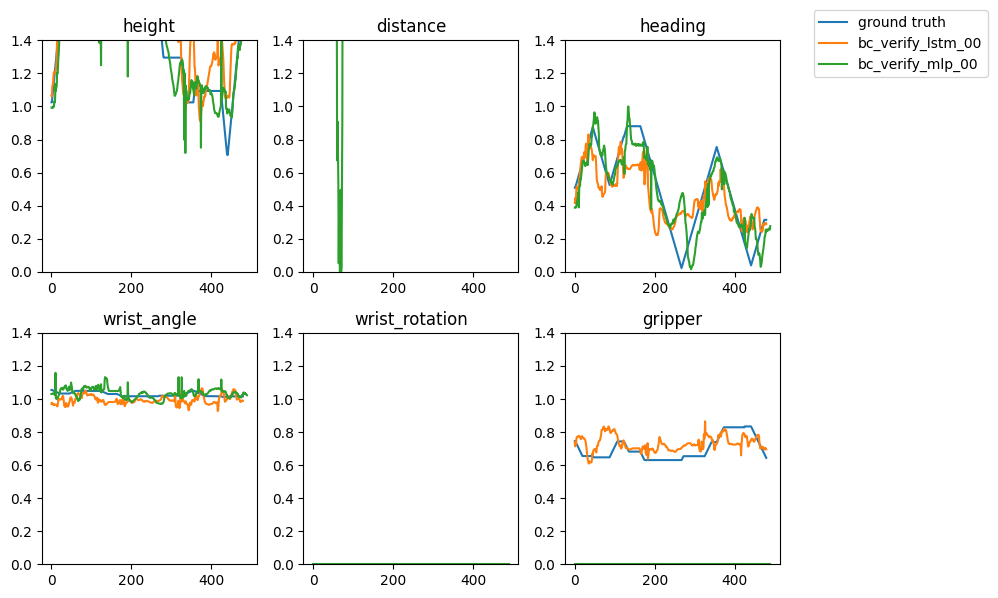

In [10]:
fig, axs = plt.subplots(2,3, figsize=(8, 6))
titles = ["height","distance", "heading", "wrist_angle", "wrist_rotation", "gripper"]
# for i in range(bcexp["control_size"]):
for i in range(6):
    ax = axs[i//3, i%3]
    ax.set_ylim(0, 1.4)
    ax.plot(real_np[:,i], label="ground truth")
    for name in preds_nps:
        ax.plot(preds_nps[name][:,i], label=name)
    if i==0:
        fig.legend(bbox_to_anchor=(1.25, 1))
    ax.set_title(titles[i])

plt.tight_layout()
graphfilename = pathlib.Path(exp.data_dir(), "bccomparison.pdf")
plt.savefig(graphfilename, bbox_inches='tight')